<a href="https://colab.research.google.com/github/joshIsac/computervisionlab/blob/main/2348523_CV_lab9_Extracting_feature_descriptors_from_the_image_dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import pandas as pd

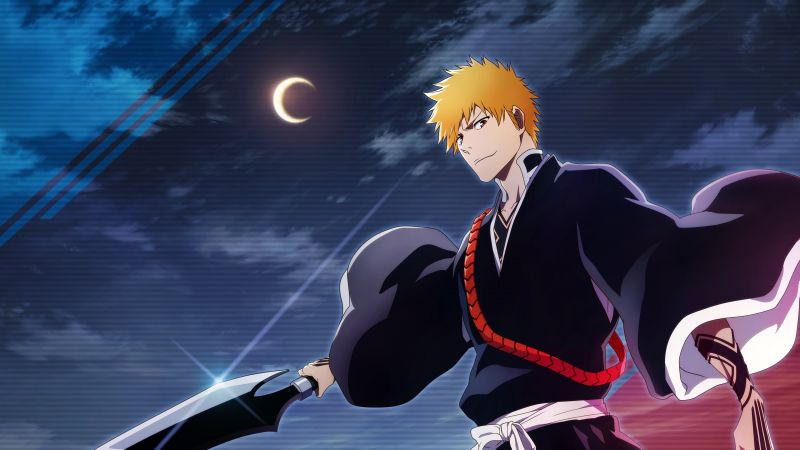

In [3]:
img_pth="/content/drive/MyDrive/kurosaki ichigo3.jpg"
img=cv2.imread(img_pth,1)
cv2_imshow(img)

In [4]:
print(img)

[[[151  91   9]
  [151  91   9]
  [150  90   8]
  ...
  [ 42  30  20]
  [ 39  29  19]
  [ 38  28  18]]

 [[153  93  11]
  [152  92  10]
  [152  92  10]
  ...
  [ 42  30  20]
  [ 39  29  19]
  [ 38  28  18]]

 [[158  98  16]
  [158  98  16]
  [157  97  15]
  ...
  [ 44  32  22]
  [ 41  31  21]
  [ 40  30  20]]

 ...

 [[129 104  88]
  [128 105  89]
  [130 105  89]
  ...
  [ 66  49 140]
  [ 66  49 140]
  [ 66  49 140]]

 [[119  96  80]
  [117  97  80]
  [119  96  80]
  ...
  [ 56  41 125]
  [ 56  41 125]
  [ 56  41 125]]

 [[117  97  80]
  [117  97  80]
  [117  97  80]
  ...
  [ 56  42 124]
  [ 56  42 124]
  [ 56  42 124]]]


In [5]:
img.shape

(450, 800, 3)

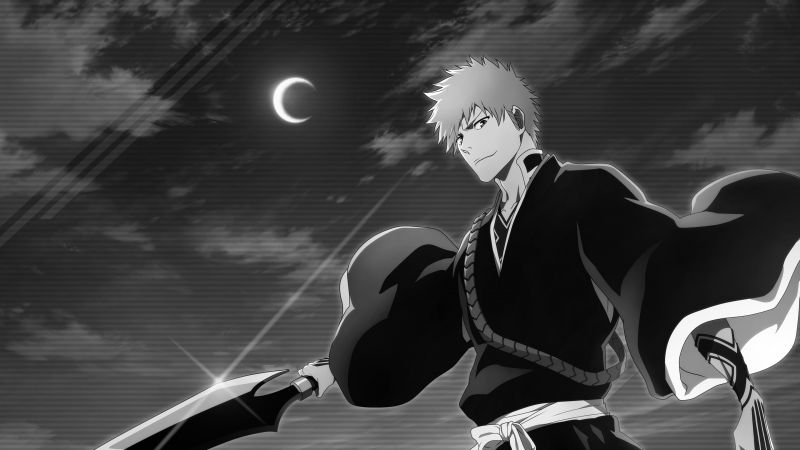

In [6]:
#convert the image to grayscale
img_gray=cv2.imread(img_pth,0)
cv2_imshow(img_gray)

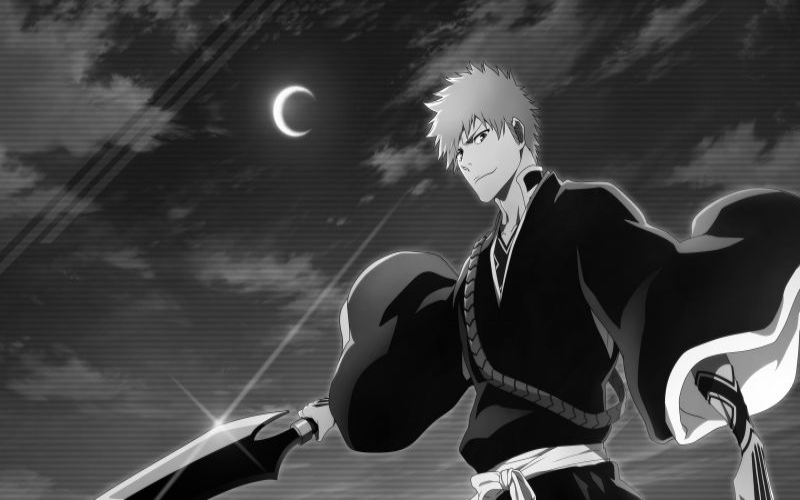

In [7]:
ichigo_img=cv2.resize(img_gray, (800,500))
cv2_imshow(ichigo_img)

array([[ 73,  73,  72, ...,  28,  27,  26],
       [ 75,  74,  74, ...,  28,  27,  26],
       [ 79,  79,  78, ...,  30,  29,  28],
       ...,
       [100, 101, 101, ...,  76,  76,  76],
       [ 94,  94,  94, ...,  68,  68,  68],
       [ 94,  94,  94, ...,  68,  68,  68]], dtype=uint8)
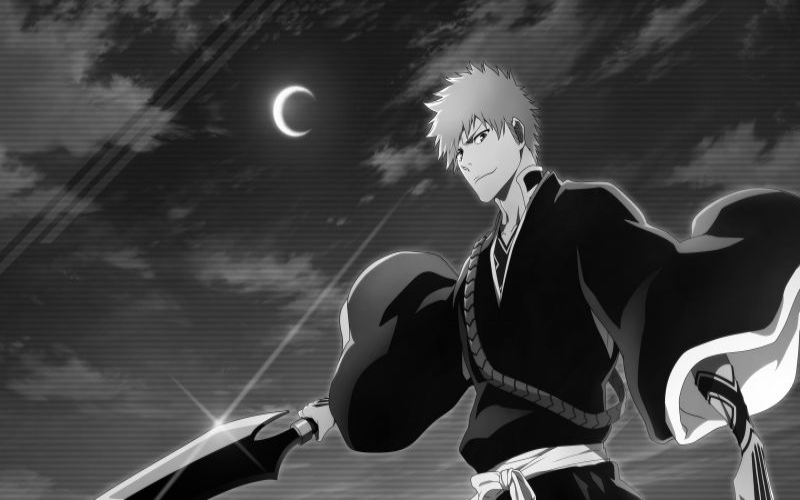

In [8]:
#add gaussian noise
img_array=np.array(ichigo_img)
img_array

In [9]:
def add_gaussian_noise(image, mean, std_dev):
    noise = np.random.normal(mean, std_dev, ichigo_img.shape).astype(np.uint8)
    noisy_image = np.clip(image + noise, 0, 255)
    return noisy_image
noisy_img_gaussian=add_gaussian_noise(img_array,mean=0,std_dev=25)


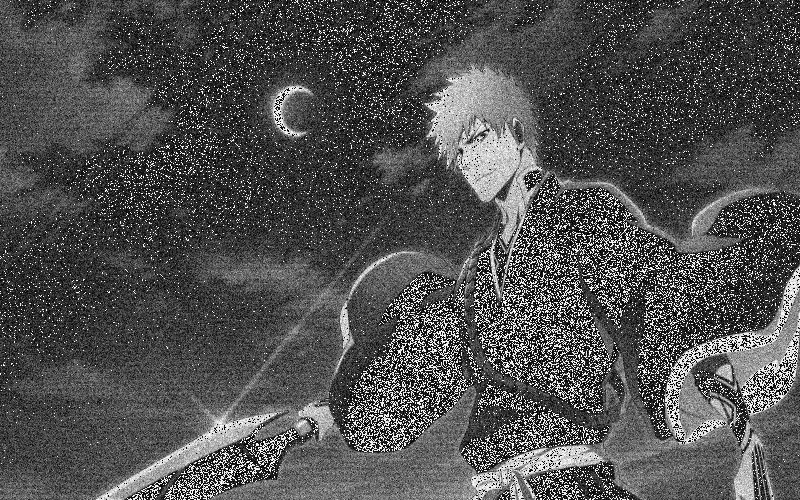

In [10]:
cv2_imshow(noisy_img_gaussian)

(-0.5, 799.5, 499.5, -0.5)

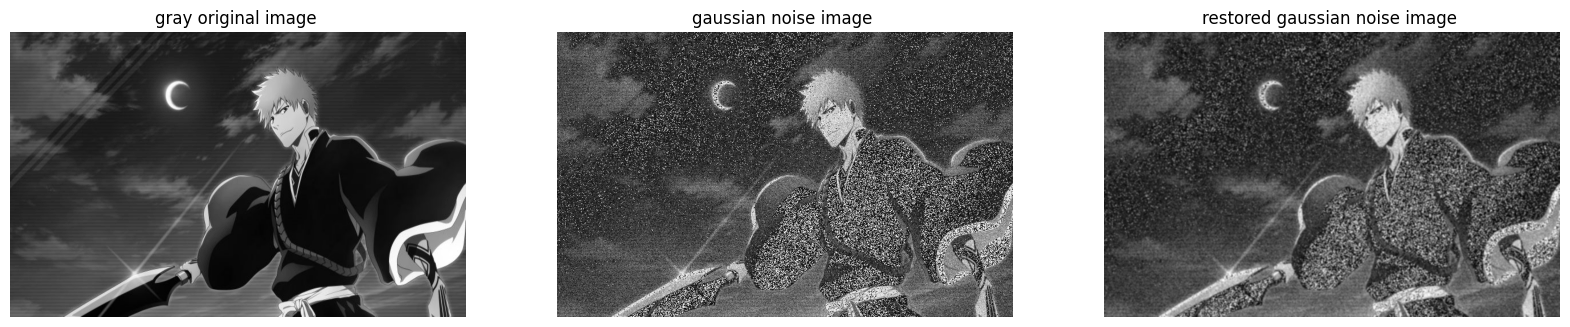

In [13]:
#to remove gaussian noise implement Gaussian blur
import matplotlib.pyplot as plt
restored_image_gaussian = cv2.GaussianBlur(noisy_img_gaussian, (5, 5), 0)


plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.imshow(ichigo_img, cmap='gray')
plt.title('gray original image ')
plt.axis('off')

plt.subplot(1,3,2)

plt.imshow(noisy_img_gaussian, cmap='gray')
plt.title('gaussian noise image ')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(restored_image_gaussian, cmap='gray')
plt.title('restored gaussian noise image ')
plt.axis('off')

(-0.5, 799.5, 499.5, -0.5)

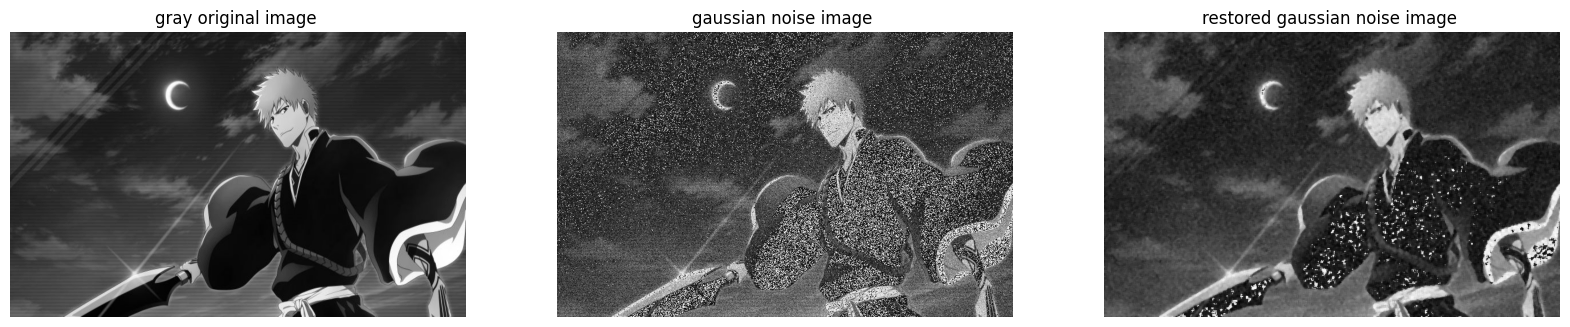

In [21]:
# Apply Median filtering
median_filtered = cv2.medianBlur(noisy_img_gaussian, 5)
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.imshow(ichigo_img, cmap='gray')
plt.title('gray original image ')
plt.axis('off')

plt.subplot(1,3,2)

plt.imshow(noisy_img_gaussian, cmap='gray')
plt.title('gaussian noise image ')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(median_filtered, cmap='gray')
plt.title('restored gaussian noise image ')
plt.axis('off')

(-0.5, 799.5, 499.5, -0.5)

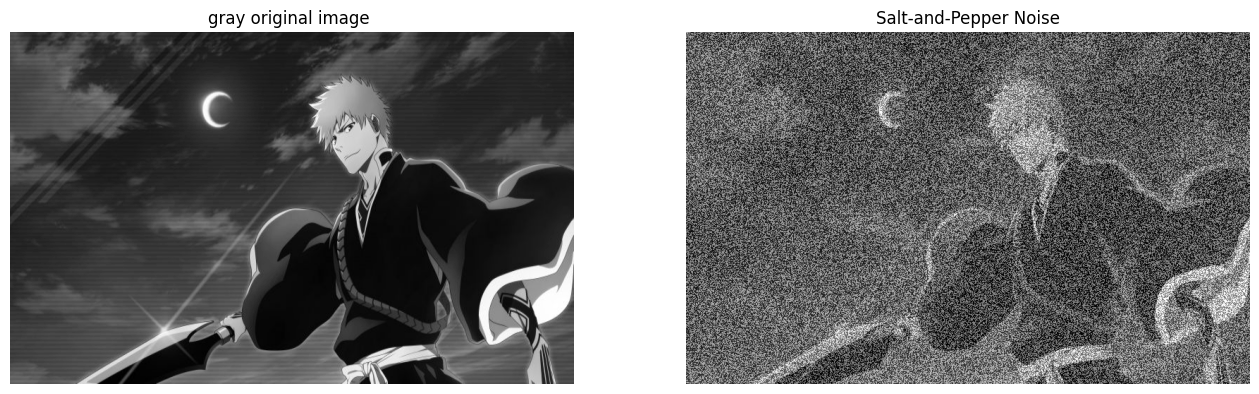

In [24]:
salt_and_pepper_noise = np.random.randint(0, 2, ichigo_img.shape) * 255
noisy_gray_img_salt_pepper = ichigo_img + salt_and_pepper_noise

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.imshow(ichigo_img, cmap='gray')
plt.title('gray original image ')
plt.axis('off')
# Noisy Gray Image with Salt-and-Pepper Noise
plt.subplot(1, 2, 2)
plt.imshow(noisy_gray_img_salt_pepper, cmap='gray')
plt.title('Salt-and-Pepper Noise')
plt.axis('off')


(-0.5, 799.5, 499.5, -0.5)

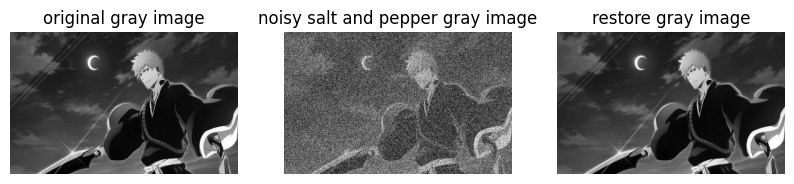

In [30]:
#remove Salt and pepper noise
noisy_img_uint8=np.uint8(noisy_gray_img_salt_pepper)
restored_img=cv2.medianBlur(noisy_img_uint8,3)

plt.figure(figsize=(10,8))
plt.subplot(1,3,1)
plt.imshow(ichigo_img, cmap='gray')
plt.title("original gray image")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(noisy_gray_img_salt_pepper, cmap='gray')
plt.title("noisy salt and pepper gray image")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(restored_img, cmap='gray')
plt.title("restore gray image")
plt.axis("off")